In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
import os

current_dir = os.getcwd()

In [5]:
mnist_data = input_data.read_data_sets('{}/mnist_data'.format(current_dir), one_hot=True)

Extracting /home/paulo/workspaces/autoencoder-mnist/mnist_data/train-images-idx3-ubyte.gz
Extracting /home/paulo/workspaces/autoencoder-mnist/mnist_data/train-labels-idx1-ubyte.gz
Extracting /home/paulo/workspaces/autoencoder-mnist/mnist_data/t10k-images-idx3-ubyte.gz
Extracting /home/paulo/workspaces/autoencoder-mnist/mnist_data/t10k-labels-idx1-ubyte.gz


In [6]:
NUM_EPOCHS = 100
BATCH_SIZE = 64

In [7]:
input_placeholder = tf.placeholder('float', [None, 28*28])
output_placeholder = tf.placeholder('float', [None, 28*28])
learning_rate = tf.placeholder('float', [])

In [8]:
weights = {
    'dlayer_01': tf.Variable(tf.random_normal([28*28, 196])),
    'dlayer_02': tf.Variable(tf.random_normal([196, 98])),
    'dlayer_03': tf.Variable(tf.random_normal([98, 49])),
    'clayer_03': tf.Variable(tf.random_normal([49, 98])),
    'clayer_02': tf.Variable(tf.random_normal([98, 196])),
    'clayer_01': tf.Variable(tf.random_normal([196, 28*28]))
}

In [9]:
biases = {
    'dlayer_01': tf.Variable(tf.random_normal([196])),
    'dlayer_02': tf.Variable(tf.random_normal([98])),
    'dlayer_03': tf.Variable(tf.random_normal([49])),
    'clayer_03': tf.Variable(tf.random_normal([98])),
    'clayer_02': tf.Variable(tf.random_normal([196])),
    'clayer_01': tf.Variable(tf.random_normal([28*28]))
}

In [10]:
dlayer_01 = tf.nn.sigmoid(tf.add(tf.matmul(input_placeholder, weights['dlayer_01']), biases['dlayer_01']))
dlayer_02 = tf.nn.sigmoid(tf.add(tf.matmul(dlayer_01, weights['dlayer_02']), biases['dlayer_02']))
dlayer_03 = tf.nn.sigmoid(tf.add(tf.matmul(dlayer_02, weights['dlayer_03']), biases['dlayer_03']))
clayer_03 = tf.nn.sigmoid(tf.add(tf.matmul(dlayer_03, weights['clayer_03']), biases['clayer_03']))
clayer_02 = tf.nn.sigmoid(tf.add(tf.matmul(clayer_03, weights['clayer_02']), biases['clayer_02']))
clayer_01 = tf.nn.sigmoid(tf.add(tf.matmul(clayer_02, weights['clayer_01']), biases['clayer_01']))

In [11]:
loss = tf.reduce_mean((clayer_01 - output_placeholder)**2)

In [12]:
train = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [13]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [14]:
for epoch in range(NUM_EPOCHS+1):
    for i in range(int(mnist_data.train.num_examples/BATCH_SIZE)):
        X_epoch, y_epoch = mnist_data.train.next_batch(BATCH_SIZE)
        _, err = sess.run([train, loss], feed_dict={input_placeholder: X_epoch, output_placeholder: X_epoch, learning_rate: 0.002})
    if(epoch % 10 == 0):
        print('EPOCH: {} - ITERATION: {} - LOSS: {}'.format(epoch, i, err))
        

EPOCH: 0 - ITERATION: 858 - LOSS: 0.08105161786079407
EPOCH: 10 - ITERATION: 858 - LOSS: 0.03727925568819046
EPOCH: 20 - ITERATION: 858 - LOSS: 0.029211226850748062
EPOCH: 30 - ITERATION: 858 - LOSS: 0.025158584117889404
EPOCH: 40 - ITERATION: 858 - LOSS: 0.023057978600263596
EPOCH: 50 - ITERATION: 858 - LOSS: 0.018603689968585968
EPOCH: 60 - ITERATION: 858 - LOSS: 0.018571410328149796
EPOCH: 70 - ITERATION: 858 - LOSS: 0.016483934596180916
EPOCH: 80 - ITERATION: 858 - LOSS: 0.015552143566310406
EPOCH: 90 - ITERATION: 858 - LOSS: 0.015782753005623817
EPOCH: 100 - ITERATION: 858 - LOSS: 0.01551600731909275


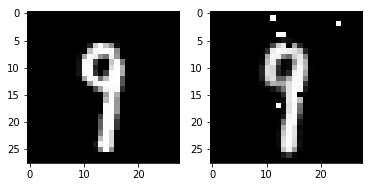

In [52]:
prediction = sess.run(clayer_01, feed_dict={input_placeholder: [mnist_data.train.images[0]]})

plt.subplot(1, 2, 1)
plt.imshow(np.reshape(mnist_data.train.images[0], [28, 28]), cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(np.reshape(prediction, [28, 28]), cmap="gray")

plt.show()

In [60]:
sess.close()